# Finding Heavy Traffic Indicators on I-94


If you are embarking on a car vacation or need to plan a business trip, it is crucial to avoid periods of heavy traffic that can cause delays and inconvenience. In this analysis, we will examine the various indicators that contribute to heavy traffic on I-94, such as weather conditions, time of travel, and other relevant factors. By understanding these indicators, you can make informed decisions to mitigate potential traffic-related challenges and ensure smoother journeys.

## Conclusions
Through our analysis of the traffic volume on I-94 in relation to different time and weather conditions, we have discovered that winter months and weekdays exhibit a notable correlation with traffic volume. Surprisingly, weather seems to have a lesser impact on traffic patterns.


## Data
Data can be downloaded from: 
[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)
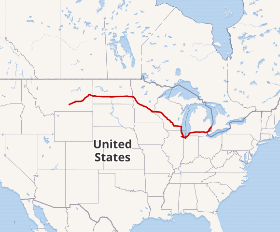 [Image from Wikipedia](https://en.wikipedia.org/wiki/Interstate_94) <br>




In [1]:
# Read in the data
import pandas as pd

traffic = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

# Print out the data information
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [2]:
# Print out the first and last five rows
print(traffic.head(5))
print(traffic.tail(5))

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

Atrribute information described by [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)

| Column Name | Column Type | Column Description|
| ----------- | ----------- | ----------- |
holiday| Categorical | US National holidays plus regional holiday, Minnesota State Fair
temp | Numeric | Average temp in kelvin
rain_1h | Numeric | Amount in mm of rain that occurred in the hour
snow_1h | Numeric | Amount in mm of snow that occurred in the hour
clouds_all | Numeric | Percentage of cloud cover
weather_main | Categorical | Short textual description of the current weather
weather_description | Categorical | Longer textual description of the current weather
date_time | DateTime | Hour of the data collected in local CST time
traffic_volume | Numeric | Hourly I-94 ATR 301 reported westbound traffic volume

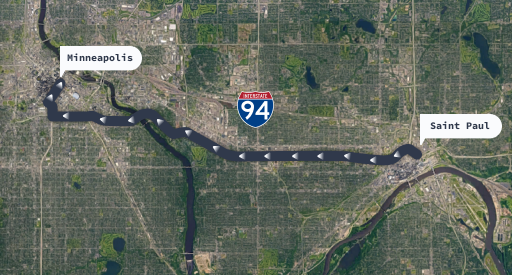
(Image from Dataquest) 
<br>
According to the dataset documentation, the traffic data was recorded by a station positioned approximately equidistant between Minneapolis and Saint Paul. Notably, this station exclusively captures data for __westbound traffic__, specifically vehicles moving from east to west. <br>

Consequently, our analysis outcomes will pertain specifically to westbound traffic in the vicinity of the mentioned station. It is crucial to avoid extrapolating these results to the entire I-94 highway, as they are not representative of the entire roadway.


## Data Visualization

We will first analyze the `traffic_volume` column by plotting the distribution.

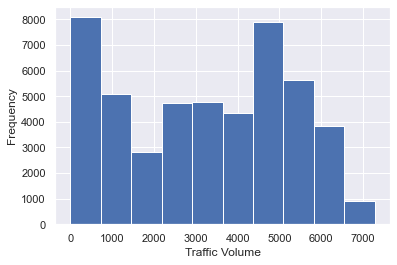

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot theme to seaborn default
sns.set_theme()

# Plot histogram
plt.hist(traffic['traffic_volume'])
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()

In [4]:
# Traffic volume column information
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

During approximately 25% of the time, the number of cars passing the station per hour was 1,193 or fewer. This is likely to occur during nighttime hours or when road construction activities are taking place. Conversely, for approximately 75% of the time, the traffic volume was significantly higher, with 4,933 cars or more passing the station per hour.
<br>

### Time 
Time can serve as a potential indicator of heavy traffic. Certain months, days, or specific times of the day may experience higher numbers of people on the road, contributing to increased traffic congestion.
<br>
Therefore, our next step will involve focusing specifically on the aspect of time.

### [1] Daytime vs. Nighttime
The potential influence of daytime and nighttime on traffic volume opens up an intriguing avenue for our analysis: __a comparison between daytime and nighttime data__. This approach allows us to explore any notable variations in traffic patterns and gain insights into how the time of day might impact the volume of traffic.
<br>


To begin our analysis, we will partition the dataset into two distinct segments:

1. Daytime data: 7 a.m. to 7 p.m. (exlusive), totaling 12 hours.
2. Nighttime data: 7 p.m. to 7 a.m. (exclusive), totaling 12 hours.

In [5]:
# Transform the data_time column to datetime
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [6]:
# Separate daytime and nighttime using the hour information
hours = traffic['date_time'].dt.hour
daytime = traffic.loc[hours.between(7,18),:]
nighttime = traffic.loc[hours.between(0,6) | hours.between(19,23), :]

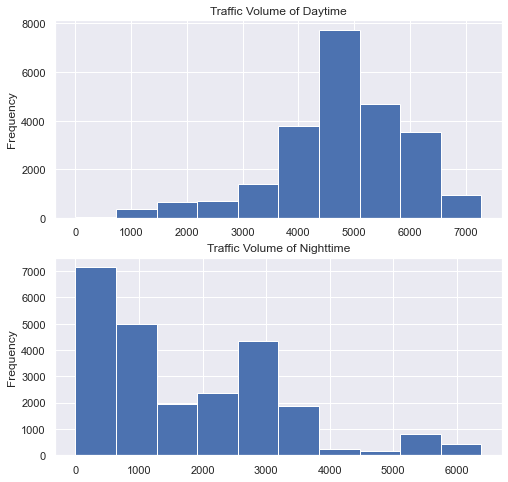

In [7]:
# Plot histogram of traffic volume for daytime and nighttime respectively
plt.figure(figsize=(8,8))
# Daytime
plt.subplot(2,1,1)
daytime['traffic_volume'].plot.hist()
plt.title('Traffic Volume of Daytime')
# Nighttime
plt.subplot(2,1,2)
nighttime['traffic_volume'].plot.hist()
plt.title('Traffic Volume of Nighttime')
plt.show()

In [8]:
print("Daytime:\n{}".format(daytime['traffic_volume'].describe()))
print("\nNighttime:\n{}".format(nighttime['traffic_volume'].describe()))

Daytime:
count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Nighttime:
count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64



The analysis reveals distinct traffic volume patterns between daytime and nighttime.
<br>
During the daytime, the traffic volume demonstrates a left-skewed distribution. The peak traffic volume occurs around 4,500, with an average volume of 4,762. Conversely, the nighttime traffic volume exhibits a right-skewed distribution. The maximum traffic volume is significantly lower and concentrated at volumes below 1,000. The mean traffic volume during nighttime is also comparatively lower.
<br>

Given the lighter traffic during nighttime and our objective of identifying indicators of heavy traffic, we will exclude the nighttime data from our analysis. Instead, our focus will be solely on the __daytime data__, where the potential for significant traffic congestion is higher.

### [2] Month vs. Traffic Volume

In [9]:
# The following method would cause SettingWithCopyWarning
# month = daytime['date_time'].dt.month.copy()
# daytime.loc[:,'month'] = month
# See details about the issue:
# https://www.dataquest.io/blog/settingwithcopywarning/
# We don't know if we are replacing the value with the original Dataframe (traffic) or the copied Dataframe (daytime)

# To prevent the warning, make a copy
day = daytime.copy()
month = day['date_time'].dt.month
day.loc[:,'month'] = month

# Group the dataset by the month column with the mean as an aggregate function
by_month = day.groupby('month').mean()
print(by_month['traffic_volume'])

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64


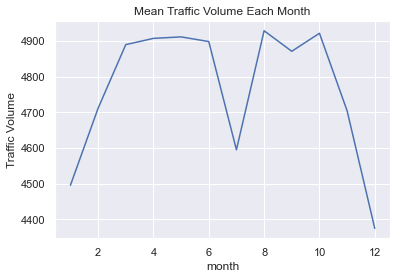

In [10]:
by_month['traffic_volume'].plot.line()
plt.ylabel('Traffic Volume')
plt.title('Mean Traffic Volume Each Month')
plt.show()

The average traffic volume tends to be lower during the winter season, spanning from December to February. As the weather becomes warmer, the traffic volume gradually increases. However, it is interesting to note that there is a dip in traffic volume during July, which deviates from the general trend.

### [3] Day of Week vs. Traffic Volume
Next, we will proceed to construct line plots for another time unit: the __day__ of the week.

In [11]:
day['dayofweek'] = day['date_time'].dt.dayofweek
# Group the dataset by the month column with the mean as an aggregate function
by_dayofweek = day.groupby('dayofweek').mean()
print(by_dayofweek['traffic_volume'])

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64


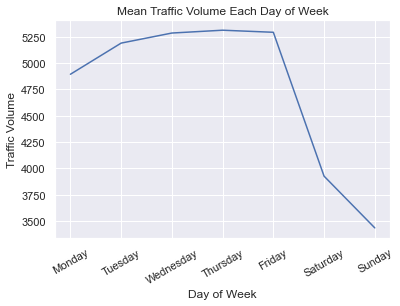

In [12]:
by_dayofweek['traffic_volume'].plot.line()
plt.ylabel('Traffic Volume')
plt.xlabel('Day of Week')
plt.xticks(ticks=[0,1,2,3,4,5,6],
           labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
          rotation=30)
plt.title('Mean Traffic Volume Each Day of Week')
plt.show()

The traffic volume is much higher on week days and decreases significantly during weekends. This observation suggests that the majority of the traffic is predominantly attributed to business-related travels rather than leisure or vacation travels on I-94.

### [4] Time of day vs. Traffic Volume
Next, we will generate a line plot representing the traffic volume throughout different times of the day. However, since weekends tend to have lower average values, we will analyze the averages separately. To accomplish this, we will initially divide the data into two categories based on the day type: business days and weekends.

In [13]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print("Business Hour Traffic Volume: {}".format(by_hour_business['traffic_volume']))
print('\n')
print("Weekend Hour Traffic Volume: {}".format(by_hour_weekend['traffic_volume']))

Business Hour Traffic Volume: hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64


Weekend Hour Traffic Volume: hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


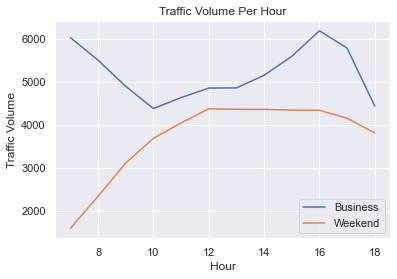

In [14]:
plt.plot(by_hour_business['traffic_volume'],label='Business')
plt.plot(by_hour_weekend['traffic_volume'],label='Weekend')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume Per Hour')
plt.legend()
plt.show()

The traffic volume exhibits peaks around 7 AM and 4-5 PM. Throughout business days, the traffic volume consistently surpasses that of weekends, even during non-peak hours. On weekends, there isn't a distinct traffic peak; however, the volume gradually increases from 7 AM until noon and remains elevated until 4 PM, after which it begins to decline.

### Time Analysis Conclusions
Based on our analysis of time-related factors, we have discovered that the majority of the traffic volume is attributed to daytime traffic. 
<br>
The following heavy traffic indicators have been identified:

- Time of the year: Winter experiences lower traffic volume, while July surprisingly exhibits lower traffic volume compared to other warmer months.
- Higher traffic volume is observed on weekdays.
- During business days, peak traffic occurs around 7 AM and 4-5 PM.
- On weekends, the traffic volume is significantly lower compared to business days. Additionally, the volume increases from 7 AM to 12 PM and remains relatively constant until 4 PM.

### Weather

Weather represents another potential indicator of heavy traffic. The dataset contains several columns related to weather, including temperature (`temp`), rainfall in the last hour (`rain_1h`), snowfall in the last hour (`snow_1h`), cloud cover (`clouds_all`), weather condition (`weather_main`), and detailed weather description (`weather_description`).

To explore their relationship with traffic_volume, we will begin by examining the correlation values between these numerical weather columns and `traffic_volume`.

In [15]:
# Find the correlation values
traffic.corr()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
temp,1.000000,0.009069,-0.019755,-0.101976,0.130299
rain_1h,0.009069,1.000000,-0.000090,0.004818,0.004714
snow_1h,-0.019755,-0.000090,1.000000,0.027931,0.000733
clouds_all,-0.101976,0.004818,0.027931,1.000000,0.067054
traffic_volume,0.130299,0.004714,0.000733,0.067054,1.000000


The average temperature (`temp`) and the percentage of cloud cover (`clouds_all`) have the strongest correlation with the traffic volume. 

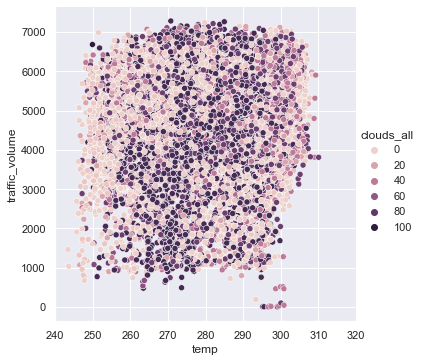

In [16]:
sns.relplot(data=day, x='temp', y='traffic_volume',
           hue='clouds_all')
plt.xlim([240,320])
plt.show()

However, the correlation between these weather columns and traffic_volume is only approximately 0.1 or less. Based on the relational plots, it is challenging to discern a clear relationship between the numerical weather columns and the traffic volume.

In order to explore for potentially more informative data, our attention will now shift towards the __categorical__ weather-related columns: `weather_main` and `weather_description`.

Our approach involves calculating the average traffic volume associated with each distinct value present in these two columns. By doing so, we aim to uncover any discernible patterns or insights related to different weather conditions.

In [17]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

In [18]:
# Short text weather explaination
by_weather_main

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek,hour
weather_main,,,,,,,,
Clear,283.812078,0.000000,0.000000,1.670265,4778.416260,6.490599,3.138928,12.404248
Clouds,282.929274,0.000000,0.000000,62.667548,4865.415996,6.393243,3.005631,12.911974
Drizzle,284.456433,0.170804,0.000000,84.704417,4837.212911,7.105323,2.934315,12.308041
Fog,277.579641,0.163840,0.001409,65.477901,4372.491713,6.646409,2.798343,10.325967
Haze,275.319353,0.040036,0.000000,64.000000,4609.893285,5.832134,2.754197,12.467626
Mist,279.420825,0.249992,0.000825,74.961435,4623.976475,6.734285,2.895102,11.078288
Rain,287.089601,3.972943,0.000292,75.870116,4815.568462,6.774023,2.914467,12.642379
Smoke,292.405833,0.878333,0.000000,53.333333,4564.583333,6.833333,2.416667,13.166667
Snow,267.984505,0.014017,0.001768,80.501376,4396.321183,6.374828,2.750344,12.153370


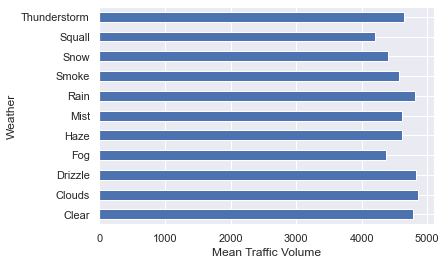

In [19]:
by_weather_main['traffic_volume'].plot.barh()
plt.xlabel('Mean Traffic Volume')
plt.ylabel('Weather')
plt.show()


The average traffic volume remains relatively consistent across various types of weather. Additionally, no weather condition exhibits a traffic volume exceeding 5,000 cars.

In [20]:
# Longer text weather explaination
by_weather_description

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek,hour
weather_description,,,,,,,,
SQUALLS,296.730000,1.020000,0.000000,75.000000,4211.000000,7.000000,2.000000,14.000000
Sky is Clear,293.232549,0.000000,0.000000,0.000000,4919.009390,7.557512,2.895540,12.453052
broken clouds,282.372927,0.000000,0.000000,72.635875,4824.130326,6.675260,2.998210,12.811314
drizzle,283.573777,0.145072,0.000000,88.589928,4737.330935,7.244604,3.028777,11.697842
few clouds,284.272965,0.000000,0.000000,19.391951,4839.818023,6.159230,2.977253,12.633421
fog,277.579641,0.163840,0.001409,65.477901,4372.491713,6.646409,2.798343,10.325967
freezing rain,272.860000,0.000000,0.000000,90.000000,4314.000000,6.500000,0.500000,13.500000
haze,275.319353,0.040036,0.000000,64.000000,4609.893285,5.832134,2.754197,12.467626
heavy intensity drizzle,285.467931,0.276207,0.000000,89.172414,4738.586207,7.551724,2.896552,12.275862


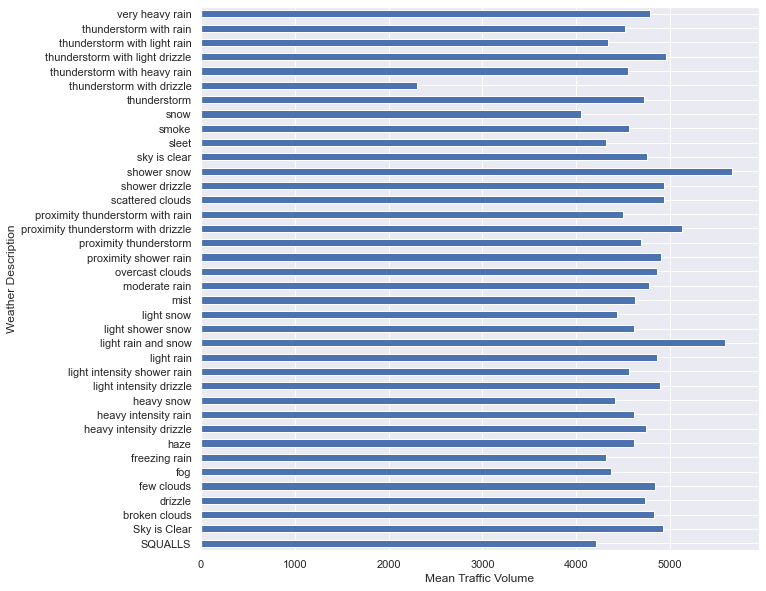

In [21]:
by_weather_description['traffic_volume'].plot.barh(figsize=(10,10))
plt.xlabel('Mean Traffic Volume')
plt.ylabel('Weather Description')
plt.show()

In instances of shower snow, light rain and snow, or proximity thunderstorm with rain, the traffic volume surpasses 5,000 cars. This suggests that snowfall weather conditions may serve as an indicator of heavy traffic. However, it is worth noting that heavy snow does not correspond to a significantly higher traffic volume. Consequently, it is challenging to definitively conclude that weather alone can provide a reliable indicator of heavy traffic for I-94.

## Final Conclusions

Throughout this project, we have analyzed the traffic volume on I-94 in relation to various time and weather conditions. Our findings indicate that time demonstrates a significant correlation with traffic volume, whereas weather plays a lesser role. The following factors serve as indicators of heavy traffic:

- Winter months (March-October)
- Weekdays, particularly during peak hours around 7 AM and 4-5 PM
- Although lower than weekdays, weekend traffic volume experiences an increase after 8 AM.

By avoiding the aforementioned periods of heavy traffic, you can ensure a smoother and more efficient business trip or vacation experience.